## Mount Google Drive

In [2]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Call Libraries

In [3]:
# Call libraries
import numpy as np
import pandas as pd

# For OS related operations
import os
import matplotlib.pyplot as plt

# For data splitting
from sklearn.model_selection import train_test_split

# Modeler
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
###################### Random Forest ############################
from sklearn.ensemble import RandomForestClassifier 
#use RandomForestRegressor for regression problem

#The model definition for Neural Network
from keras import models
from keras import layers

import seaborn as sns

# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')

# to display all outputs of one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 100

# Class for applying multiple data transformation jobs
# Scale numeric data
# One hot encode data--Convert to dummy
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer as CTT
from sklearn.preprocessing import StandardScaler as ss, OneHotEncoder as ohe
from sklearn.ensemble import ExtraTreesClassifier as etc,RandomForestClassifier as rf
from sklearn.ensemble import AdaBoostClassifier as adc,BaggingClassifier as bgc
from imblearn.ensemble import BalancedRandomForestClassifier as brf
from sklearn.ensemble import GradientBoostingClassifier as GBC
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from imblearn.metrics import classification_report_imbalanced

In [4]:
#Read the data file
carvan1=pd.read_csv('/content/gdrive/MyDrive/Colab_data_files/caravan-insurance-challenge.csv')

In [7]:
carvan1.head(5)

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
carvan1.dtypes

ORIGIN      object
MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
             ...  
APLEZIER     int64
AFIETS       int64
AINBOED      int64
ABYSTAND     int64
CARAVAN      int64
Length: 87, dtype: object

In [6]:
base = carvan1[carvan1['ORIGIN']=='train']
vldn = carvan1[carvan1['ORIGIN']=='test']
_=base.pop('ORIGIN')
_=vldn.pop('ORIGIN')
y_base=base.pop('CARAVAN')
y_vldn=vldn.pop('CARAVAN')

In [7]:
carvan1.dtypes

ORIGIN      object
MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
             ...  
APLEZIER     int64
AFIETS       int64
AINBOED      int64
ABYSTAND     int64
CARAVAN      int64
Length: 87, dtype: object

In [8]:
base.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [9]:
base.columns[base.isna().sum()>0]

Index([], dtype='object')

In [ ]:
base.isna().any()

MOSTYPE     False
MAANTHUI    False
MGEMOMV     False
MGEMLEEF    False
MOSHOOFD    False
            ...  
AZEILPL     False
APLEZIER    False
AFIETS      False
AINBOED     False
ABYSTAND    False
Length: 85, dtype: bool

In [13]:
pd.crosstab(carvan1.ORIGIN,carvan1.CARAVAN)

CARAVAN,0,1
ORIGIN,,
test,3762,238
train,5474,348


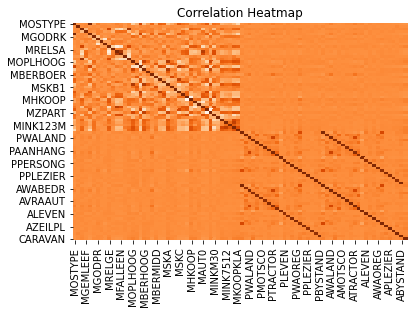

In [10]:
ax= plt.axes()
_=sns.heatmap(carvan1.drop(columns=['ORIGIN']).corr(),cmap='Oranges',cbar=None,ax=ax)
_=ax.set_title('Correlation Heatmap')

Finding unique values in every column for all dataframes carvan1, base and validation respectively

In [14]:
pd.DataFrame(carvan1.nunique()).T

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,2,40,9,6,6,10,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,10,...,7,4,6,5,6,6,6,6,10,7,3,5,9,4,7,2,7,5,3,3,2,9,6,5,5,4,7,6,4,7,2,2,3,8,2,3,5,3,3,2


In [15]:
pd.DataFrame(base.nunique()).T

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,40,9,5,6,10,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,9,10,10,10,8,10,10,10,10,10,10,10,...,4,6,4,6,4,6,5,5,6,10,7,3,5,9,3,7,2,7,5,3,3,2,7,5,4,4,4,5,5,3,6,2,2,3,7,2,3,4,3,3


In [16]:
pd.DataFrame(vldn.nunique()).T

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,40,9,6,6,10,9,10,6,10,10,8,10,10,10,10,10,10,10,10,6,9,10,10,10,10,10,10,10,9,10,10,10,9,10,10,10,10,10,10,10,...,5,7,4,5,3,4,6,6,6,8,6,3,3,9,3,6,2,6,5,3,2,2,7,3,4,4,3,6,4,4,6,2,2,2,6,2,3,4,2,2


Data Preprocessing: differentiating categorical and numerical variables

In [17]:
cat_col = ['MOSTYPE','MOSHOOFD']
num_cols = list(base.columns.values[43:])
ctt = CTT([('ss',ss(),num_cols),
           ('ohe',ohe(),cat_col)],remainder='passthrough')

In [24]:
cat_col = ['MOSTYPE','MOSHOOFD']
num_cols = list(base.columns.values[43:])
ctt = CTT([ ('ss',ss(),num_cols),
           ('ohe',ohe(),cat_col)],remainder='passthrough')

In [25]:
sm_trainX , sm_trainY = SMOTE(random_state=42).fit_resample(base,y_base)
tm_trainX ,tm_trainY = TomekLinks().fit_resample(base,y_base)
cmb_trainX, cmb_trainY = SMOTETomek(random_state=42).fit_resample(base,y_base)

In [11]:
print('Imbalanced Sample')
y_base.value_counts()
print('Over_sampled Sample')
sm_trainY.value_counts()
print('Under_Sampled Sample')
tm_trainY.value_counts()
print('Combine_sampled Sample')
cmb_trainY.value_counts()

Imbalanced Sample


0    5474
1     348
Name: CARAVAN, dtype: int64

Over_sampled Sample


NameError: ignored

In [26]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,classification_report
import itertools
def plot_confusion_matrix(y_true, y_pred, classes, ax=None, cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(classification_report_imbalanced(y_true,y_pred))
    
    fig, ax = (plt.gcf(), ax)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title('Confusion Matrix')

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
def plot_roc(y_true, y_pred, ax=None):
    """Plot ROC curve""" 
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_pred)
    roc_score = roc_auc_score(y_true,y_pred)
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)

    ax.set_title("Receiver Operating Characteristic")
    ax.plot(false_positive_rate, true_positive_rate)
    ax.plot([0, 1], ls="--")
    ax.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax.annotate('ROC: {:.5f}'.format(roc_score), [0.75,0.05])
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    fig.tight_layout()
    return roc_score
def feat_imps(model, X_train, plot=False, n=None):
    """ Dataframe containing each feature with its corresponding importance in the given model"""
    fi_df = pd.DataFrame({'feature':X_train.columns,
                          'importance':model.feature_importances_}
                        ).sort_values(by='importance', ascending=False)
    if plot:
        fi_df[:(n if n is not None else 15)].plot.bar(x='feature',y='importance')
    else:
        return fi_df
def plot_cmroc(y_true, y_pred, classes=[0,1], normalize=True):
    """Convenience function to plot confusion matrix and ROC curve """
    fig,axes = plt.subplots(1,2, figsize=(9,4))
    plot_confusion_matrix(y_true, y_pred, classes=classes, ax=axes[0])
    roc_score = plot_roc(y_true, y_pred, ax=axes[1])
    fig.tight_layout()
    plt.show()
    return roc_score